# Importando bibliotecas

In [583]:
import pandas as pd               # Data Handling
import numpy as np                # Scientific computing
import matplotlib.pyplot as plt   # Data visualization

import os                         #File and path handling
import dataframe_image as dfi     #Save dataframe as image
import imageio

In [676]:
from IPython.display import clear_output

### Configurações

In [1133]:
import warnings; warnings.filterwarnings('ignore')
import seaborn as sns; sns.set()

### Funções

In [1552]:
def set_fig(x=5, y=3, grid=111):
    
    fig = plt.figure(figsize=(x,y)); ax = fig.add_subplot(grid)
    return fig, ax

# Lendo Dados (em csv com pandas)

In [14]:
cod = pd.read_csv('data/cod_brasil_obitos.csv')

In [16]:
cod.head()

,_id,Causa,Causa Classificada,UF ID,Unidade de federação,Sexo,Idade,Ano,Taxa de mortalidade,Número de óbitos,Mortalidade Proporcional,Classificação,top,filtro_1
0,1650550,Glomerulonefrite aguda,108 Glomerulonefrite aguda,135,Brasil,Ambos,Todas as idades (padronizado),1990,0.18,0,0,108,NaN,NaN
1,1650655,Câncer de mama,020 Câncer de mama,135,Brasil,Ambos,Todas as idades (padronizado),2000,9.19,0,0,20,NaN,NaN
2,1650741,Glomerulonefrite aguda,119 Glomerulonefrite aguda,135,Brasil,Ambos,Todas as idades (padronizado),2014,0.03,0,0,119,NaN,NaN
3,1650752,Hepatite,086 Hepatite,135,Brasil,Ambos,Todas as idades (padronizado),2010,0.62,0,0,86,NaN,NaN
4,1650782,Apendicite,086 Apendicite,135,Brasil,Ambos,Todas as idades (padronizado),2016,0.66,0,0,86,NaN,NaN


# Exploração de Dados

In [22]:
top = cod.groupby('Causa').mean().sort_values(by='Taxa de mortalidade', ascending=False).head(30)
years = sorted(cod['Ano'].unique())
causes = sorted(cod['Causa'].unique())

In [115]:
exp_rep = {}  # Lista do Relatório de exploração

#### Número de Causas de Mortes Distíntas

In [119]:
exp_rep[0] = 'Número de causas de morte distíntas: ' + str(len(causes))

#### Período dos Dados

In [282]:
exp_rep[1] = f'Período da série histórica: {years[0]} até {years[-1]}'

#### Relatório escrito

In [283]:
exp_rep

{1: 'Período da série histórica: 1990 até 2017',
 0: 'Número de causas de morte distíntas: 133'}

### Estatísticas Básicas

In [591]:
stats = cod[['Taxa de mortalidade']].describe()
dfi.export(stats, 'tabelas\\taxa_stats.png')

stats

,Taxa de mortalidade
count,3724.000000
mean,5.735193
std,14.273676
min,0.000000
25%,0.250000
50%,1.360000
75%,4.540000
max,169.100000


### Taxa de Mortalidade das Dez Principais Causas de Morte em 2017

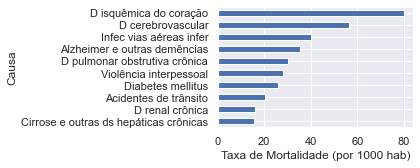

In [625]:
top_2017 = cod[cod['Ano']==2017].sort_values(by='Taxa de mortalidade', ascending=False).set_index('Causa')['Taxa de mortalidade']

fig, ax = set_fig(6,2.5);
top_2017[:10].sort_values().plot.barh(ax=ax)

ax.set(xlabel='Taxa de Mortalidade (por 1000 hab)')
fig.tight_layout(pad=1.08)
fig.savefig('figs\\top_causas_2017.png', tight_layout=True); plt.show()

### Série Histórica das Dez Principais Causas de Morte

In [864]:
def plot_time_series(ax, ignore=ignore):

    for causa, taxa in zip(top_2017.index[ignore:10], top_2017[ignore:10]):
        
        label = causa+': '+str(taxa)
        cod[ cod['Causa']==causa ].sort_values(by='Ano').plot(x='Ano',
                                                              y='Taxa de mortalidade',
                                                              label=label,
                                                              marker='o',
                                                              ax=ax)
        titles = ['Série Histórica da Terceira à Décima Principal Causa de Morte em 2017 (legenda: taxa de mortalidade em 2017)',
                  'Série Histórica das Dez Principais Causas de Morte em 2017 (legenda: taxa de mortalidade em 2017)']
        if ignore==2: title = titles[0]
        else: title=titles[1]
        ax.set(ylabel='Taxa de Mortalidade (em 1000 hab)',
               title=title)

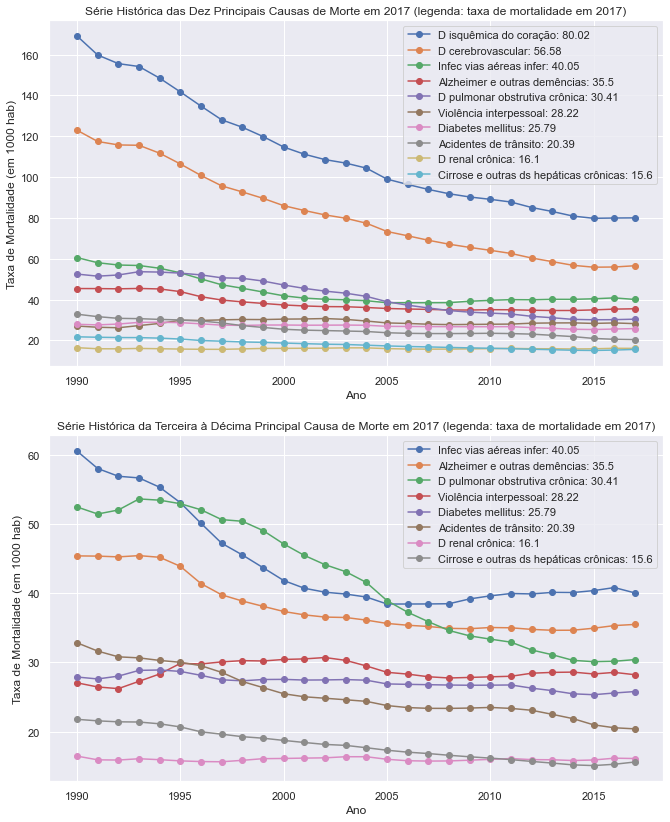

In [865]:
fig = plt.figure(figsize=(11, 14))
axes = [fig.add_subplot(2,1,i) for i in [1,2]]

for ignore, ax in zip([0,2], axes):

    plot_time_series(ax, ignore)
    
fig.savefig('figs/Série_histórica.png', tight_layout=True); plt.show()

### Extraindo Taxas de Mortalidade em uma tabela separada

In [255]:
ser = [pd.Series(sorted(cod['Ano'].unique()))]

taxas_causas = []
for causa in cod['Causa'].unique():
    taxas_causas.append(
        cod[cod['Causa']==causa][['Taxa de mortalidade', 'Ano']]
        .sort_values(by='Ano')
        .rename(columns={'Taxa de mortalidade':causa})
        .iloc[:,0]
        .reset_index(drop=True)
    ) 
    
causes_df = pd.concat(ser + taxas_causas, axis=1, join='inner').rename(columns={0:'Ano'})

In [256]:
causes_df.head()

,Ano,Glomerulonefrite aguda,Câncer de mama,Hepatite,Apendicite,Cardiomiopatia e miocardite,Out ferimentos não intencionais,Hemoglobinopatias e anemias hemolíticas,Síndrome de morte súbita infantil,Transtornos vasculares intestinais,...,Anomalias congênitas,Exposição às forças da natureza,Out ds digestivas,Câncer de fígado,Out acidentes de transporte,Câncer de testículo,"Hérnia inguinal, femoral e abdominal",D pulmonar intersticial e sarcoidose pulmonar,D de Chagas,Autolesão
0,1990,0.18,8.25,0.85,0.75,10.90,2.17,1.46,0.16,2.58,...,20.81,0.03,2.12,5.07,1.44,0.14,1.07,0.96,7.29,7.16
1,1991,0.16,8.22,0.82,0.73,11.23,2.06,1.43,0.15,2.59,...,19.89,0.04,2.12,5.05,1.42,0.14,1.06,0.97,6.94,6.98
2,1992,0.14,8.42,0.81,0.72,11.66,2.01,1.40,0.15,2.56,...,19.03,0.12,2.11,5.06,1.36,0.14,1.04,0.99,6.73,6.92
3,1993,0.12,8.74,0.81,0.72,12.20,2.01,1.38,0.15,2.52,...,18.39,0.00,2.12,5.05,1.36,0.14,1.03,1.02,6.53,6.97
4,1994,0.11,8.90,0.80,0.70,12.58,1.98,1.36,0.16,2.48,...,17.83,0.01,2.12,5.02,1.39,0.14,1.00,1.05,6.23,6.89


### Correlação Temporal da Taxa de Mortalidade por Causa de Morte (a partir de 2010)

In [1566]:
year_corr = causes_df[causes_df['Ano']>=2010].corr()[['Ano']].sort_values(by='Ano') # Correlação das Causas de Morte Ordenadas.
top_corr = abs(year_corr)['Ano'].sort_values(ascending=False).index[:20] # Causas de Morte ordenadas por correlação absoluta.

In [1567]:
print('Porcentagem das causas de morte com correlção temporal positiva:', (cor_ser>0).mean().round(3)['Ano']*100, '%')
print('Porcentagem das causas de morte com correlção temporal negativa:', 100-(cor_ser>0).mean().round(3)['Ano']*100, '%')

Porcentagem das causas de morte com correlção temporal positiva: 28.4 %
Porcentagem das causas de morte com correlção temporal negativa: 71.6 %


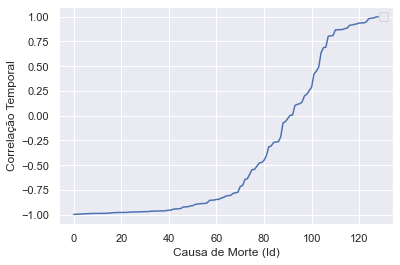

In [558]:
cor_ser.reset_index().plot()
plt.ylabel('Correlação Temporal')
plt.xlabel('Causa de Morte (Id)')
plt.legend([])
fig.savefig('figs/correlação_ano.png', tight_layout=True); plt.show()

## Regressões Lineares da Taxa de Mortalidade entre 2010 e 2017

In [376]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import r2_score

### Coeficientes Lineares e Precisão das Regressões (R2)

In [431]:
tgs = []

for causa in cod['Causa'].unique():
    
    causa_df = cod[cod['Causa']==causa]
    y = causa_df[['Taxa de mortalidade']][causa_df['Ano']>2010]
    x = causa_df[['Ano']][causa_df['Ano']>2010]
    
    lr_obj = lr().fit(x, y)
    scr = r2_score(y, lr_obj.predict(x))
    
    tgs.append([causa, lr_obj.coef_[0][0], lr_obj.intercept_[0], scr])

tgs_df = pd.DataFrame(tgs, columns=['causa', 'tg', 'b', 'scr'])
tgs_df.sort_values(by='tg', ascending=False, inplace=True)

In [432]:
x = np.arange(2010, 2018, 1)
lines = np.array([a*x + b for a, b in zip(tgs_df['tg'], tgs_df['b'])]).T
lines_df = pd.DataFrame(lines, index=x, columns=tgs_df['causa'])

In [618]:
sorted_index = (abs(tgs_df['tg'])
                .sort_values(ascending=False)
                .index
               )
tgs_sorted = (tgs_df
              .loc[sorted_index]
              .head(10)
              .set_index('causa')
              .rename(columns={'tg':'a'})
             )

In [620]:
dfi.export(tgs_sorted, 'tabelas/resultado_regressão.png'); tgs_sorted

,a,b,scr
causa,,,
D isquêmica do coração,-1.316429,2733.668571,0.847228
D cerebrovascular,-1.054643,2182.150714,0.796450
Transtornos do período neonatal,-0.773571,1575.237143,0.999331
Acidentes de trânsito,-0.552143,1133.830000,0.974447
D pulmonar obstrutiva crônica,-0.422143,881.171429,0.745629
Anomalias congênitas,-0.328929,672.396429,0.985960
Ds urinárias e infertilidade masculina,0.286429,-568.794286,0.921834
Câncer de estômago,-0.237500,488.126429,0.934494
Exposição às forças da natureza,-0.196786,396.626429,0.396536


### Causas de Morte com Coeficientes Lineares Mais Positivos (Taxa Aumentando mais rápidamente com o tempo)

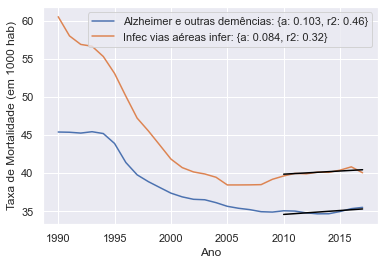

In [569]:
labels = (tgs_df['causa'].iloc[2:4].values + 
          ': {a: ' + tgs_df['tg'].iloc[2:4].round(3).astype(str).values + 
          ', r2: ' + tgs_df['scr'].iloc[2:4].round(2).astype(str).values + '}'
         )

fig, ax = set_fig(6, 4)

causes_df.set_index('Ano')[tgs_df['causa'][2:4]].plot(ax=ax)
#ax.set(xlim=(2000))
ax.legend(labels)
lines_df.iloc[:, 2:4].plot(ax=ax, color='black', legend=False)
ax.set(ylabel='Taxa de Mortalidade (em 1000 hab)',
       title='Série histórica - Maiores Coeficientes Lineares Positivos (entre 2010 a 2017) - 1')

fig.savefig('figs/coef_pstv_1.png', tight_layout=True); plt.show()

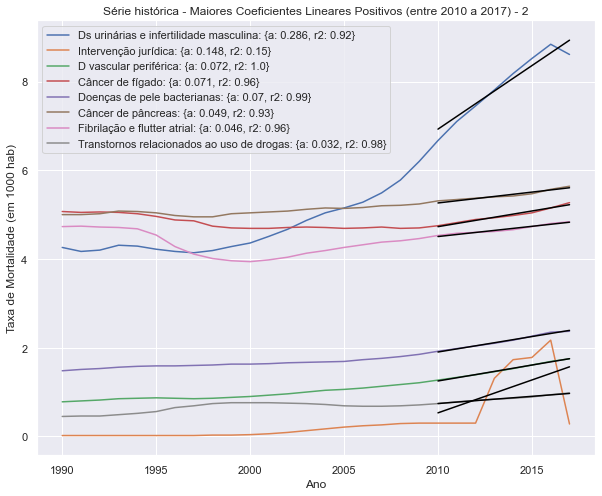

In [574]:
remain = [0,1,4,5,6,7,8,9]

labels = (tgs_df['causa'].iloc[remain].values + 
          ': {a: ' + tgs_df['tg'].iloc[remain].round(3).astype(str).values + 
          ', r2: ' + tgs_df['scr'].iloc[remain].round(2).astype(str).values + '}'
         )

fig, ax = plt.subplots(1,1,figsize=(10,8))

causes_df.set_index('Ano')[tgs_df['causa'].iloc[remain]].plot(ax=ax)
#ax.set(xlim=(2000))
ax.legend(labels)
lines_df.iloc[:, remain].plot(ax=ax, color='black', legend=False)
ax.set(ylabel='Taxa de Mortalidade (em 1000 hab)',
       title='Série histórica - Maiores Coeficientes Lineares Positivos (entre 2010 a 2017) - 2')

fig.savefig('figs/coef_pstv_2.png', tight_layout=True); plt.show()

### Causas de Morte com Coeficientes Lineares Mais Negativos (Taxa Diminuindo mais rápidamente com o tempo)

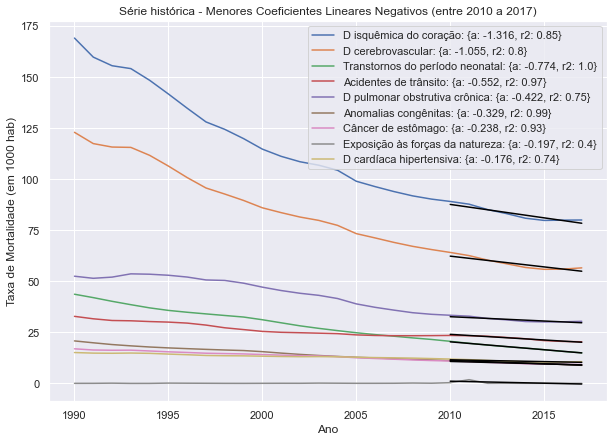

In [575]:
remain = list(range(-1, -10, -1))
labels = (tgs_df['causa'].iloc[remain].values + 
          ': {a: ' + tgs_df['tg'].iloc[remain].round(3).astype(str).values + 
          ', r2: ' + tgs_df['scr'].iloc[remain].round(2).astype(str).values + '}'
         )

fig, ax = plt.subplots(1,1,figsize=(10,7))

causes_df.set_index('Ano')[tgs_df['causa'].iloc[remain]].plot(ax=ax)
#ax.set(xlim=(2000))
ax.legend(labels)
lines_df.iloc[:, remain].plot(ax=ax, color='black', legend=False)
ax.set(ylabel='Taxa de Mortalidade (em 1000 hab)',
       title='Série histórica - Menores Coeficientes Lineares Negativos (entre 2010 a 2017)')

fig.savefig('figs/coef_ngtv.png', tight_layout=True); plt.show()

### Proporção das Causas de Morte

In [1695]:
sort = causes_df.set_index('Ano').loc[2017].sort_values(ascending=False)
cum_prob = (sort.cumsum()/sort.sum()).reset_index(drop=True)
pct = lambda x: str(round(x*sort[:threshold+1].sum()/sort.sum(), 1))+'%'

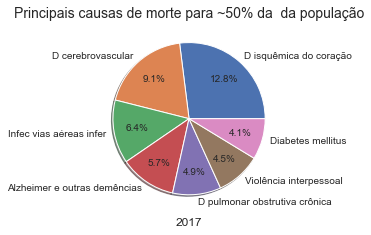

In [1699]:
p=0.5
threshold = cum_prob[cum_prob<p].index[-1]

fig, ax = set_fig(9,3.5)
sort[:threshold+1].plot.pie(shadow=True, autopct=pct, pctdistance=0.7 )
ax.set(title=f'Principais causas de morte para ~{int(p*100)}% da  da população',
       ylabel='', xlabel=2017
      )

fig.savefig('figs/causas_torta_75.png', tight_layout=True); plt.show()

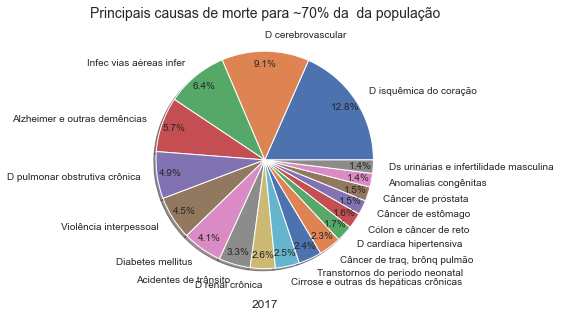

In [1703]:
p=0.7
threshold = cum_prob[cum_prob<p].index[-1]

fig, ax = set_fig(12,5)
sort[:threshold+1].plot.pie(shadow=True, labeldistance=1.15, autopct=pct, pctdistance=0.88 )
ax.set(title=f'Principais causas de morte para ~{int(p*100)}% da  da população',
       ylabel='', xlabel=2017
      )

fig.savefig('figs/causas_torta_75.png', tight_layout=True); plt.show()

### Porcentagem das Principais Causas de Morte (Animação)

##### Instalar para permitir conversão de frames para mp4 ou outros formatos de vídeo usando a biblioteca imageio

In [759]:
# !pip install imageio-ffmpeg

Note: you may need to restart the kernel to use updated packages.


In [ ]:
threshold = 0
for prob in np.arange(0.999, 0.5, -0.001):
    
    #if threshold!=cum_prob[cum_prob<prob].index[-1]:  
    threshold = cum_prob[cum_prob<prob].index[-1]

    fig, ax = set_fig()
    sort[:threshold+1].plot.pie(ax=ax)
    ax.set(ylabel='',
           title=f'Causas de Morte para {round(prob*100, 1)}% da população')

    fig.savefig(f'animação\\frames\\pizza_prob_{str(round(prob*100,1)).replace(".", "-")}.png')

#    print(f'{100-round(prob*100, 1)}/50.0')
    if p in np.arange(0.999, 0.5, -0.005):
        clear_output(wait=True)
        plt.show()
        plt.pause(.1)
    
clear_output(wait=False)

In [860]:
import imageio

dir_name = 'animação\\frames'
filenames = [os.path.join(dir_name, filename) for filename in os.listdir(dir_name)[1:]]

images = []
images_20 = []
for filename in filenames:
    file = imageio.imread(filename)    
    images.append(file)
    for i in range(1): images_20.append(file)

#imageio.mimsave('animação\\animação.gif', images, duration=0.05)
#imageio.mimsave('animação\\animação.mp4', [img for i, img in enumerate(images_20) if i%2==0])

### Série Histórica - Diferença da Taxa

In [890]:
dif_df = pd.DataFrame(np.diff(causes_df.set_index('Ano'), axis=0), index=causes_df['Ano'][1:], columns=causes_df.columns[1:])

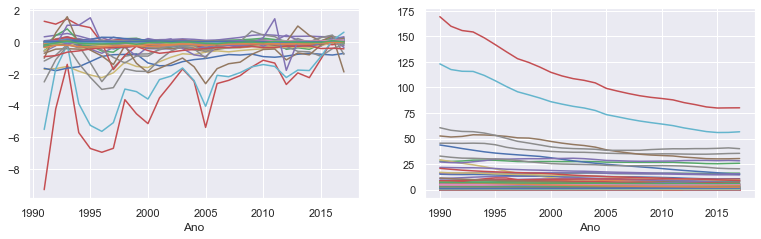

In [994]:
fig, ax = set_fig(13,3.5,grid=121)
ax0 = fig.add_subplot(122)

dif_df.plot(legend=[], ax=ax)
causes_df.set_index('Ano').plot(legend=[], ax=ax0)